In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1544, 1600, 3)


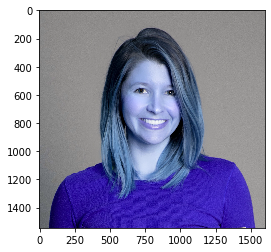

In [2]:
image = cv2.imread('IMG_3353.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

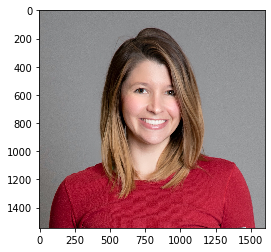

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([43.91663315, 43.53876442, 38.88461489]),
 array([224.62533484, 225.61967974, 226.88296922]),
 array([89.07545011, 91.95034691, 92.45007894])]

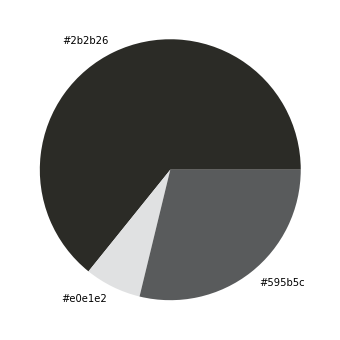

In [20]:
get_colors(get_image('one.jpeg'), 3, True)

[array([186.1041847 , 185.1561855 , 185.04655769]),
 array([64.44976656, 65.4837637 , 62.58438304]),
 array([123.71708859, 123.30345186, 122.75966335])]

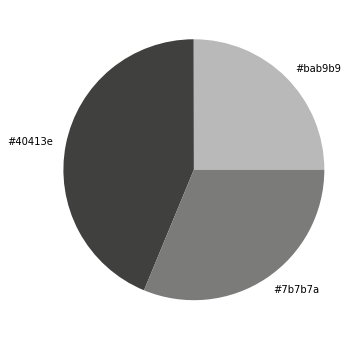

In [21]:
get_colors(get_image('two.jpeg'), 3, True)

[array([50.15707938, 49.13861144, 43.23977741]),
 array([199.41114082, 200.50477129, 196.1260733 ]),
 array([128.94717028, 129.56193049, 126.72150496])]

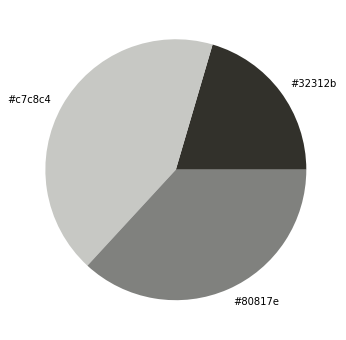

In [22]:
get_colors(get_image('three.jpeg'), 3, True)

[array([219.20601653, 215.10650593, 210.51783394]),
 array([139.68578868, 135.88526793, 128.66217882]),
 array([74.47652523, 72.79763997, 72.00065277])]

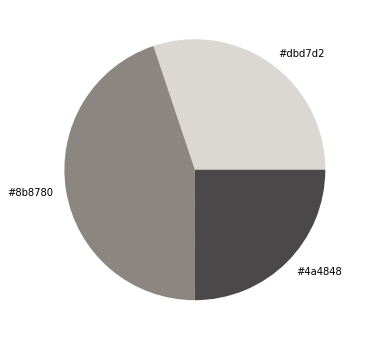

In [23]:
get_colors(get_image('four.jpeg'), 3, True)

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [96]:
ax = fig.add_subplot(111, projection='3d')

In [97]:
x = [219.20601653]
y = [215.10650593]
z = [210.51783394]

In [98]:
ax.scatter(x,y,z,c = 'r', marker = 'o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

Text(0.5, 0, 'z axis')

In [99]:
plt.show()